## Import Libraries

In [117]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-processing
### Set file path

In [118]:
file_path = 'spotify_songs.csv'

### Load data

In [119]:
df = pd.read_csv(file_path)

### Overview of the raw dataframe
View some rows of the dataframe.

In [120]:
df.head(4)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093


View the statistics of the dataframe.

In [121]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [122]:
df.describe(include='object')

,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
count,32833,32828,32828,32833,32828,32833,32833,32833,32833,32833
unique,28356,23449,10692,22545,19743,4530,449,471,6,24
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,progressive electro house
freq,10,22,161,42,139,270,308,247,6043,1809


It can be seen that there are some missing values in the dataframe.

View the data types of the dataframe.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

## Data cleaning and wrangling

### Check for missing values

In [124]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

There are 3 columns with missing values. The missing values are in the following columns 'track_name', 'track_artist', and 'track_album_name'.

### Handle Missing Values

In [125]:
df[df.isnull().any(axis=1)]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In the dataframe above, there are missing concurrent values in 'track_name', 'track_artist', and 'track_album_name'. Therefore, we will drop the rows with the missing values above.

In [126]:
df.dropna(inplace=True)

Then, we will check if there are still missing values in the dataframe.

In [127]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

### Convert data types
Because the data types of the columns are normalized, we don't need to convert any data types.

### Check the consistency of the dataframe
#### Check for duplicated data

In [128]:
df.duplicated().sum()

0

There is no duplicated data in the dataframe.

### Rename the specific column
Because the column names are normalized, we don't need to rename any columns.

### Remove the specific column
We will remove the track_id, track_album_id, and playlist_id columns because they are not needed for the analysis.

In [129]:
df.drop(['track_id', 'track_album_id', 'playlist_id'], axis=1, inplace=True)

### Review the cleaned dataframe
View the first few rows of the cleaned dataframe.

In [130]:
df.head()

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Data visualization
### 1. Distribution of Track Popularity

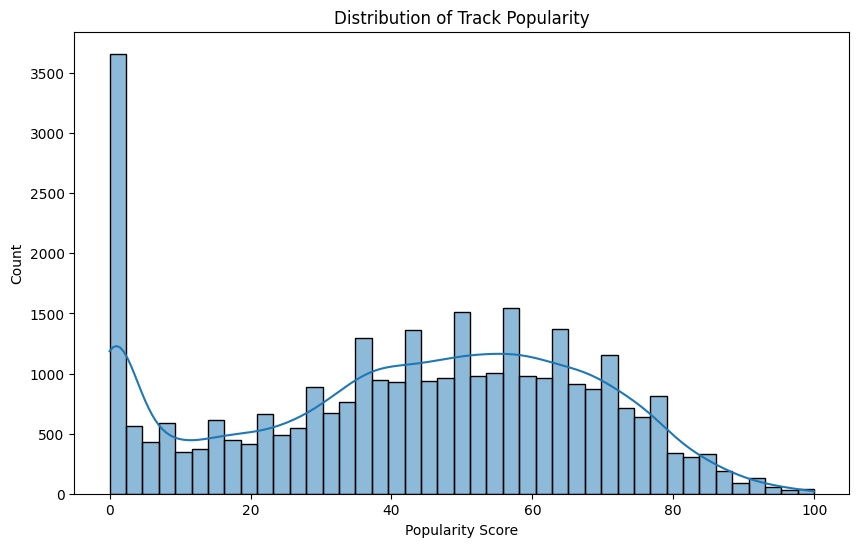

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='track_popularity', kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Count')
plt.show()

### 2. Correlation Heatmap of Audio Features

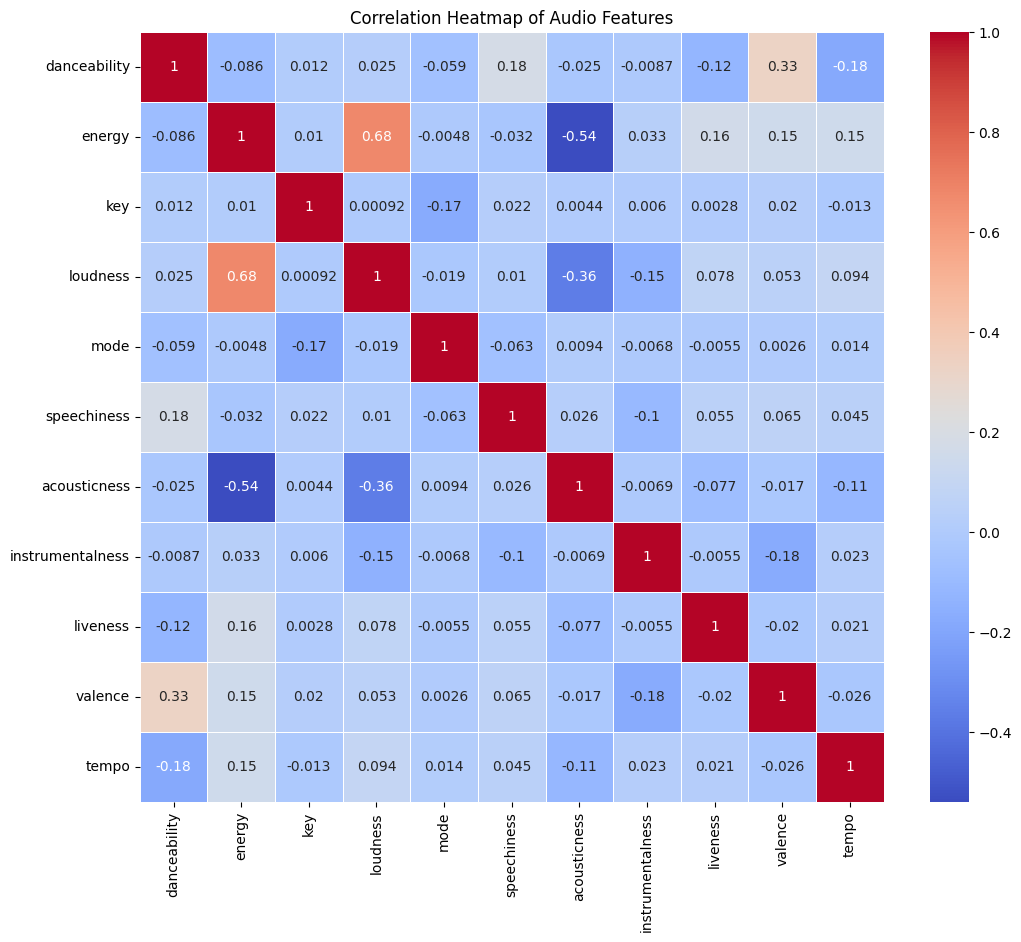

In [132]:
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(12, 10))
sns.heatmap(df[audio_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

### 3. Genre Distribution


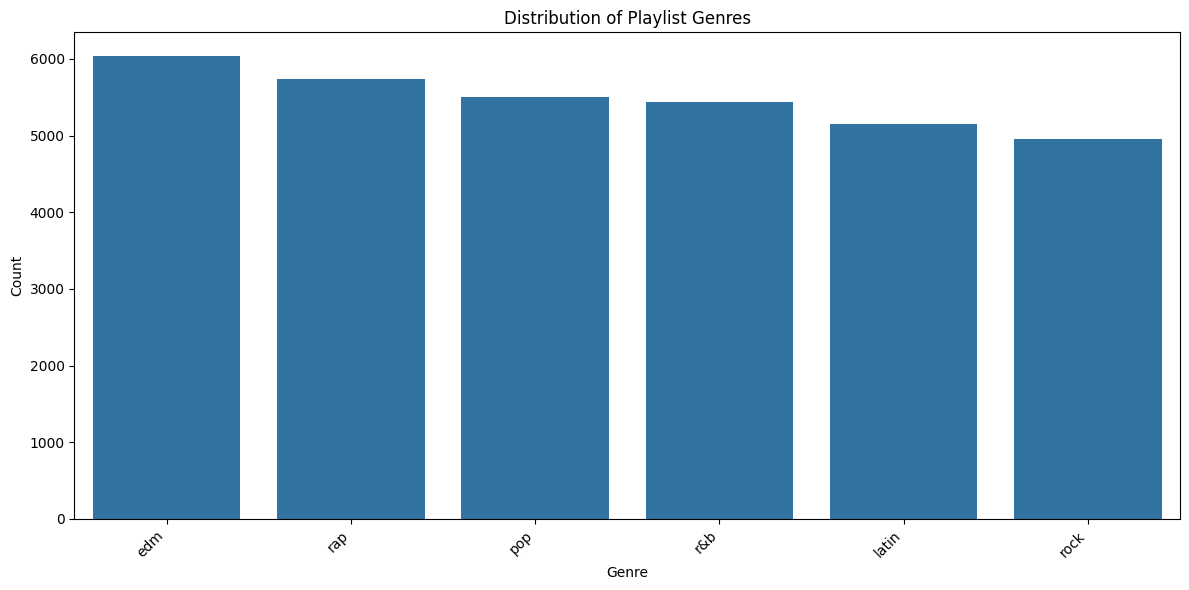

In [133]:
plt.figure(figsize=(12, 6))
genre_counts = df['playlist_genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Playlist Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Popularity vs. Audio Features

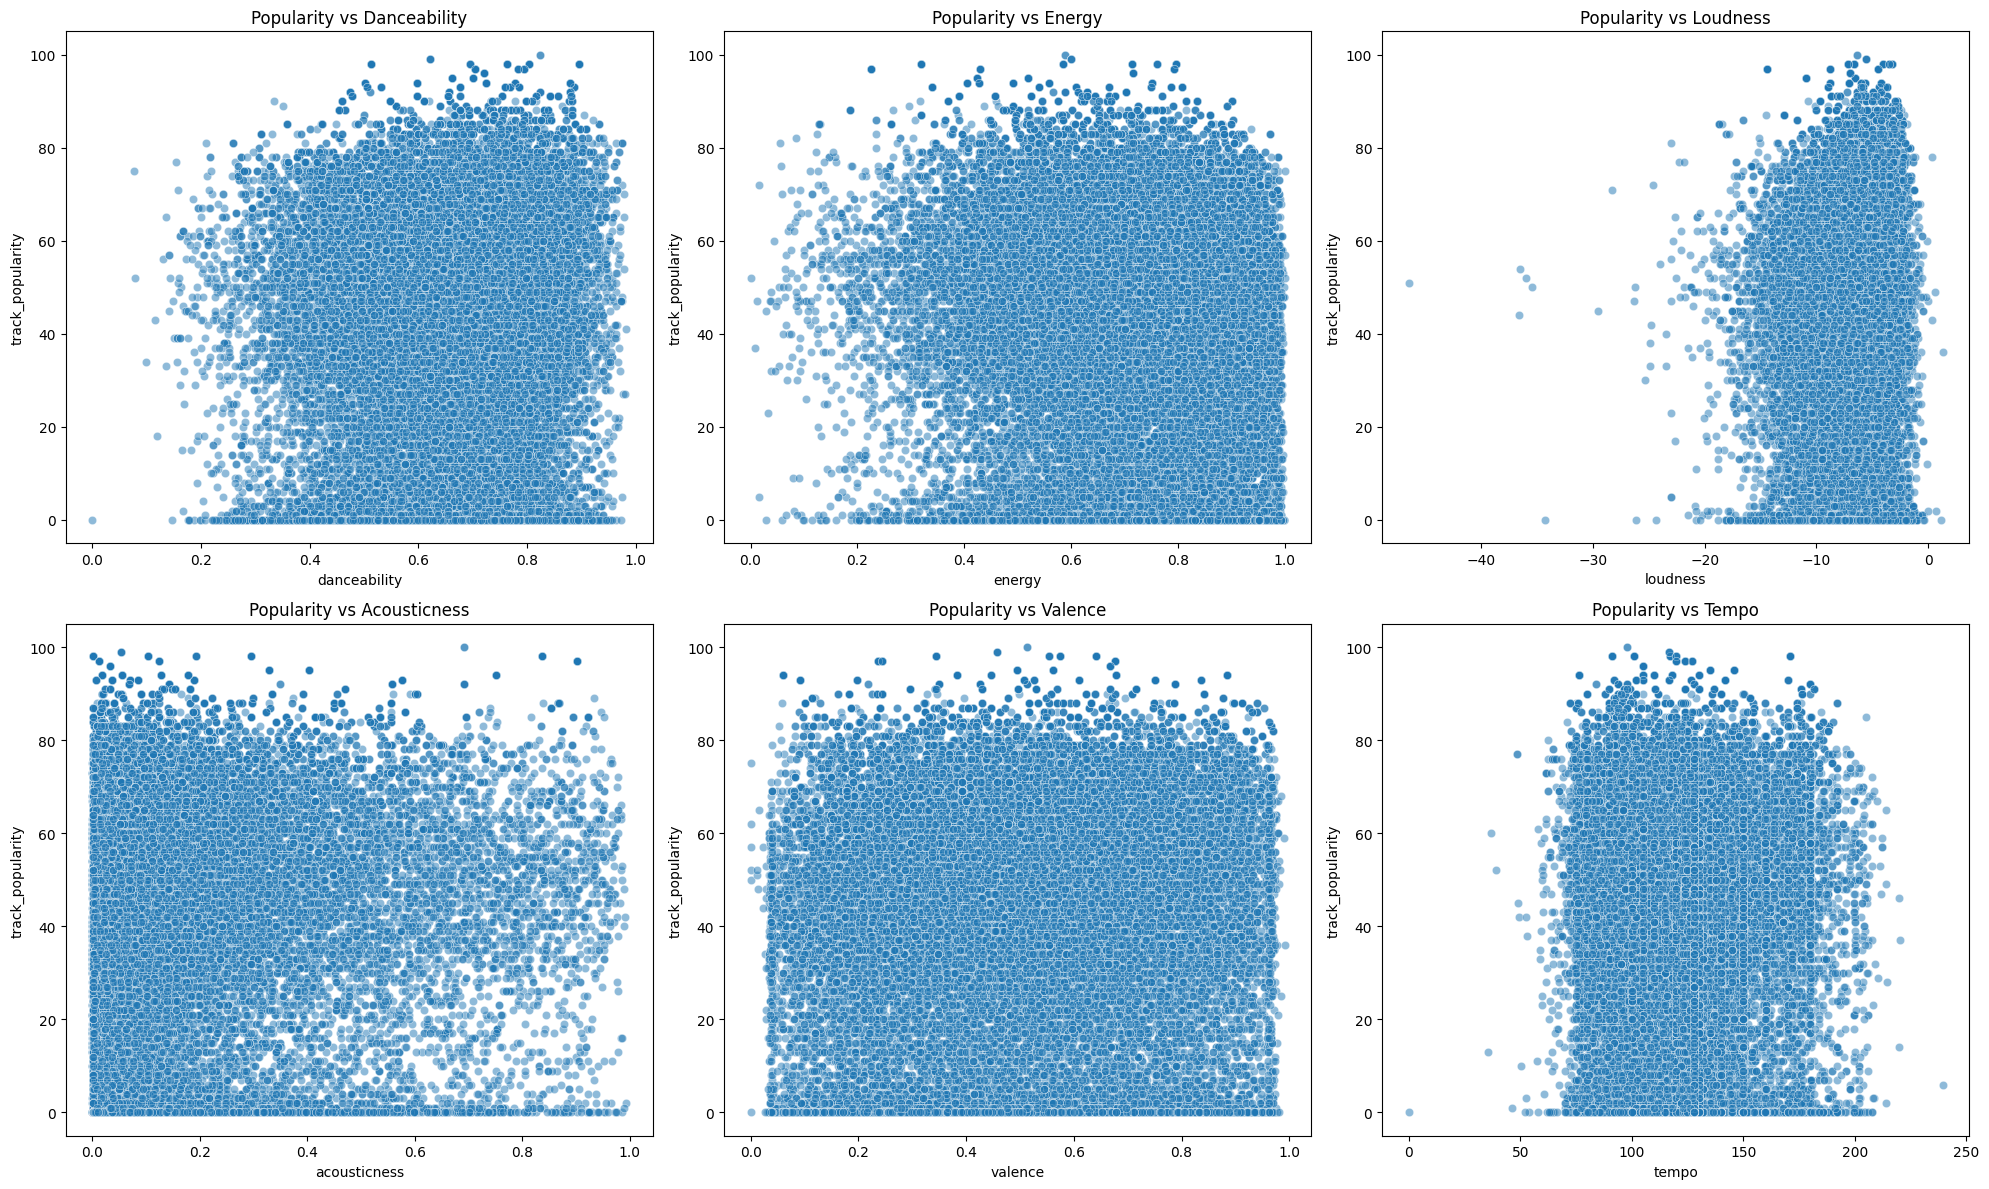

In [134]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.flatten()

features_to_plot = ['danceability', 'energy', 'loudness', 'acousticness', 'valence', 'tempo']

for i, feature in enumerate(features_to_plot):
    sns.scatterplot(data=df, x=feature, y='track_popularity', alpha=0.5, ax=axs[i])
    axs[i].set_title(f'Popularity vs {feature.capitalize()}')

plt.tight_layout()
plt.show()

### 5. Box Plot of Popularity by Genre

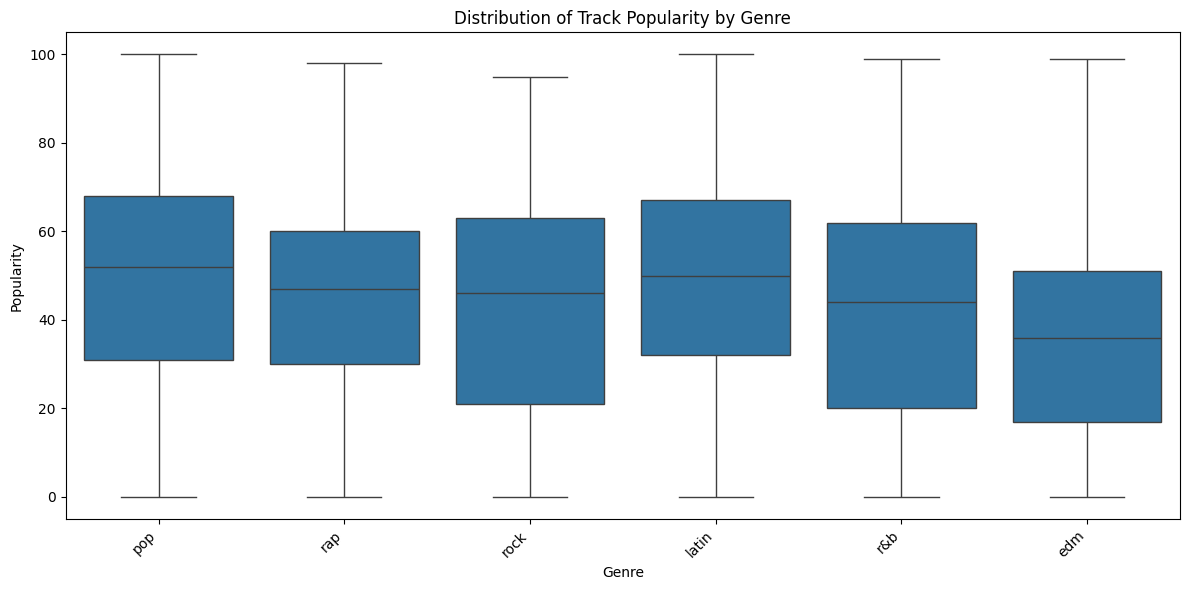

In [135]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='playlist_genre', y='track_popularity')
plt.title('Distribution of Track Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 6. Duration Distribution

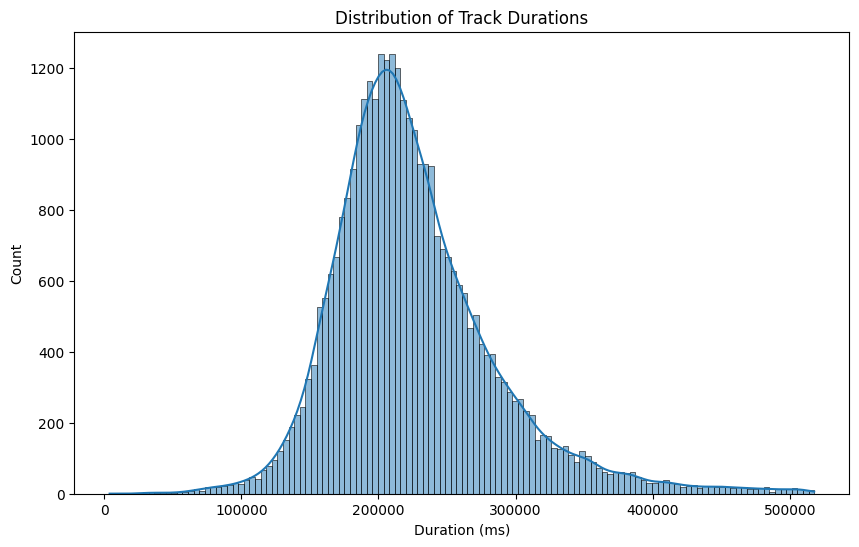

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration_ms', kde=True)
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Count')
plt.show()

### 7. Top 20 Artists by Track Count

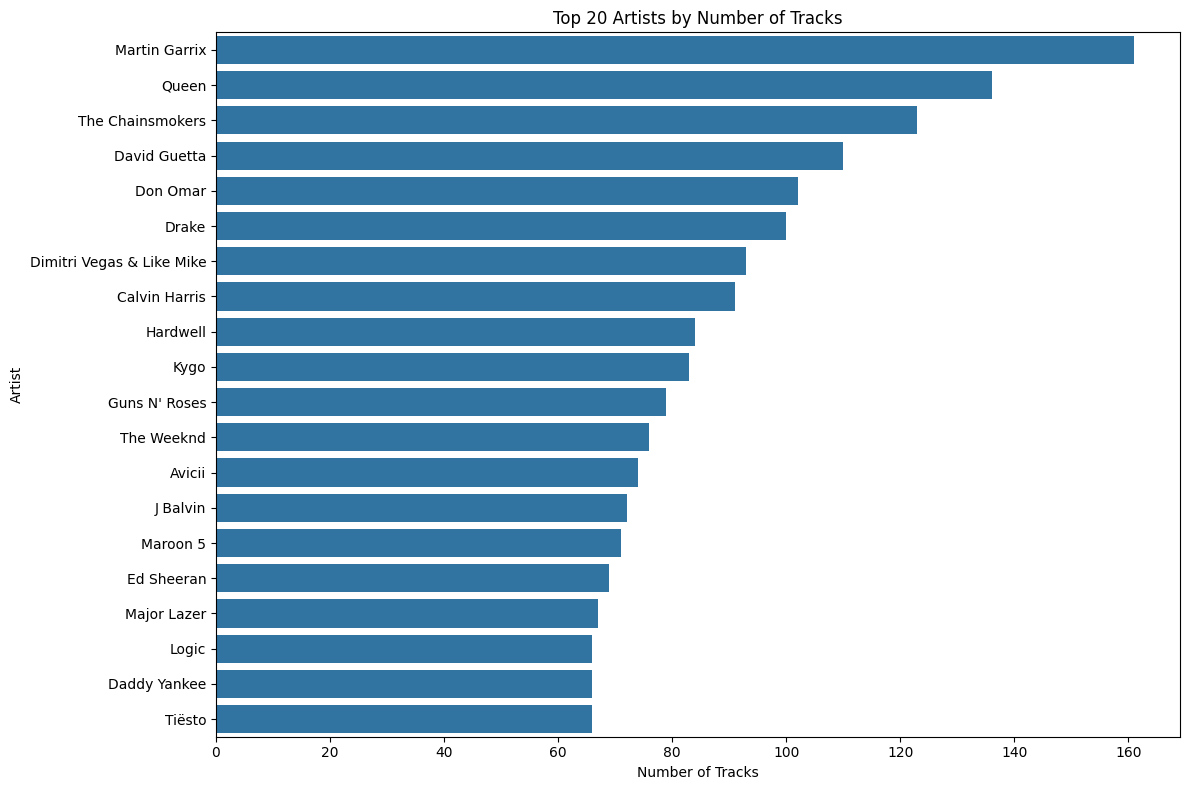

In [137]:
plt.figure(figsize=(12, 8))
top_20_artists = df['track_artist'].value_counts().nlargest(20)
sns.barplot(x=top_20_artists.values, y=top_20_artists.index)
plt.title('Top 20 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

### 8. Average Popularity by Top 20 Artists

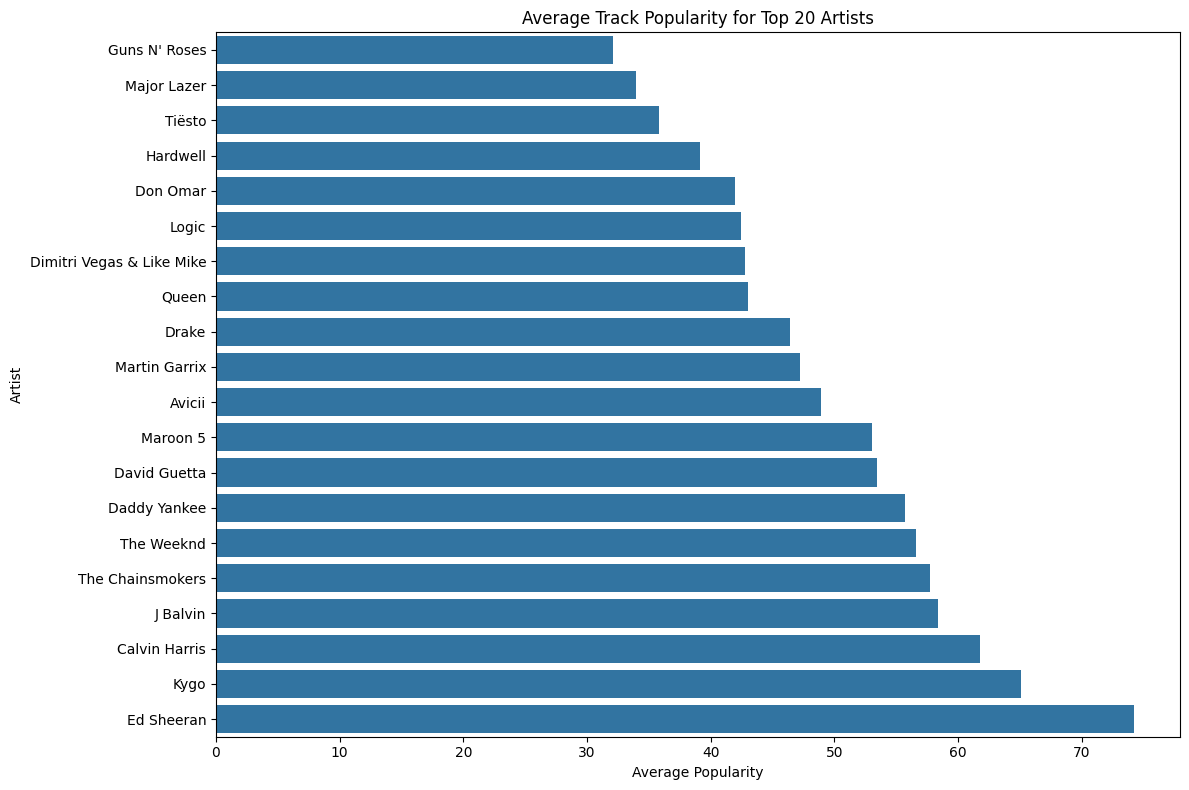

In [138]:
top_20_artists = df['track_artist'].value_counts().nlargest(20).index
artist_popularity = df[df['track_artist'].isin(top_20_artists)].groupby('track_artist')['track_popularity'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x=artist_popularity.values, y=artist_popularity.index)
plt.title('Average Track Popularity for Top 20 Artists')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

### 9. Artist Diversity Across Genres

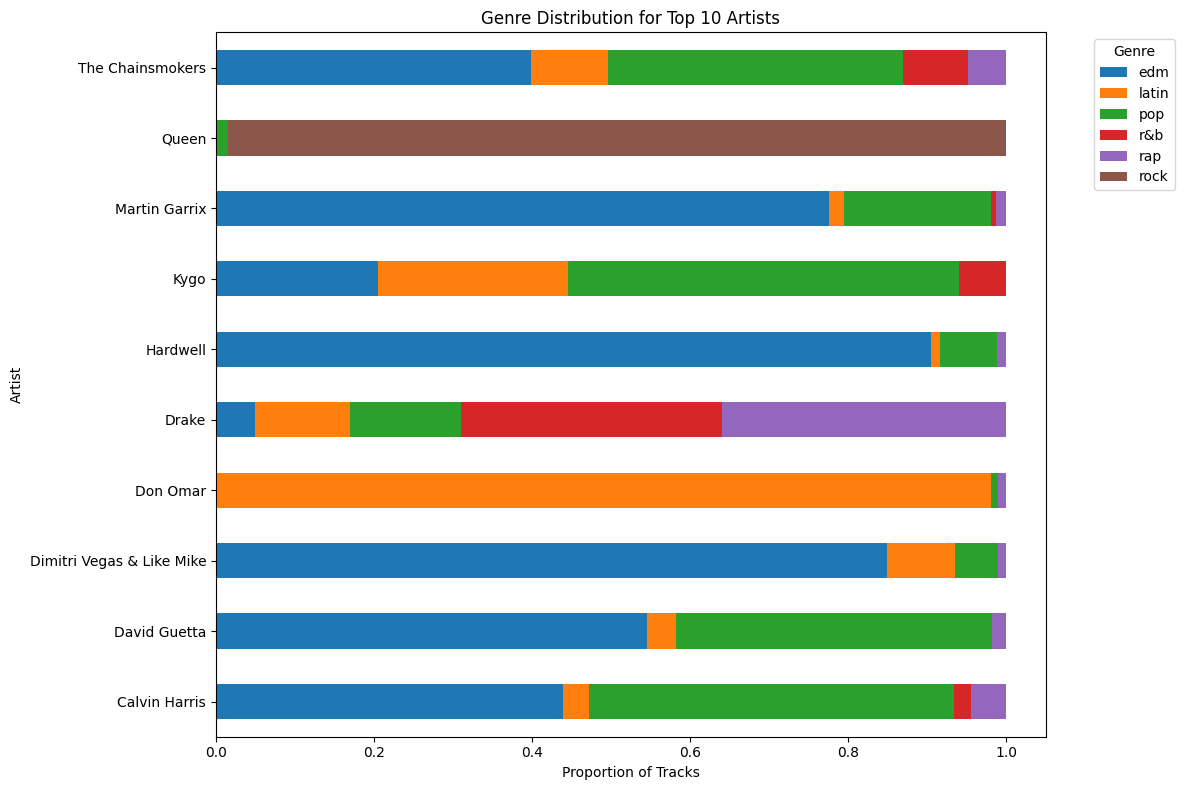

In [139]:
# Get top 10 artists by track count
top_10_artists = df['track_artist'].value_counts().nlargest(10).index

# Create a pivot table
genre_artist_pivot = df[df['track_artist'].isin(top_10_artists)].pivot_table(
    index='track_artist', 
    columns='playlist_genre', 
    values='track_name', 
    aggfunc='count', 
    fill_value=0
)

# Normalize the data
genre_artist_pivot_norm = genre_artist_pivot.div(genre_artist_pivot.sum(axis=1), axis=0)

# Plot
ax = genre_artist_pivot_norm.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Genre Distribution for Top 10 Artists')
plt.xlabel('Proportion of Tracks')
plt.ylabel('Artist')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()